In [81]:
import pandas as pd

try:
    data_path = Path('Salary_data.csv')  
    
    df = pd.read_csv(
        data_path,
        encoding='utf-8',          
        na_values=['?', 'NA'],     # Кастомные значения для NaN
        dtype={'age': 'int32'},    # Оптимизация типов данных
    )
    
    assert not df.empty, "Датафрейм пуст! Проверьте файл или путь."
    print("Данные успешно загружены. Пример строк:")
    display(df.head())

except FileNotFoundError:
    print(f"Файл не найден: {data_path}")
except Exception as e:
    print(f"Ошибка загрузки: {str(e)}")

Данные успешно загружены. Пример строк:


,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


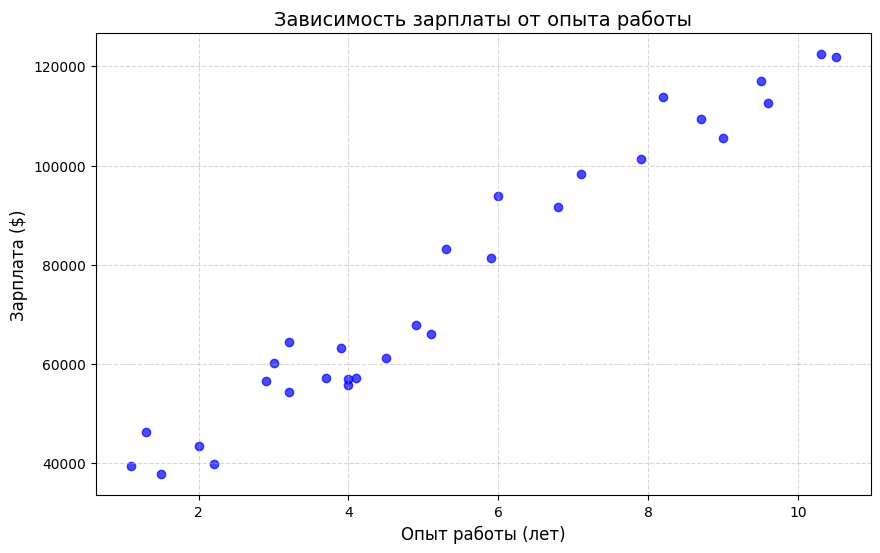

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt 
%matplotlib inline

plt.figure(figsize=(10, 6))  
plt.scatter(
    x=df['YearsExperience'],  
    y=df['Salary'],         
    alpha=0.7,             
    color='blue'
)
plt.title('Зависимость зарплаты от опыта работы', fontsize=14)
plt.xlabel('Опыт работы (лет)', fontsize=12)  
plt.ylabel('Зарплата ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)  # Сетка 
plt.show()

Разделение данных при помощи Кросс-валидации (K-Fold для стандартной задачи)

In [78]:
X = df[['YearsExperience']]
y = df['Salary']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    # random_state=2025 
)

Обучение модели с выводом коэффициентов

In [79]:
model = LinearRegression()
model.fit(X_train, y_train)

print(f'Коэффициент (угол наклона): {model.coef_[0]:.2f}')
print(f'Пересечение с осью Y: {model.intercept_:.2f}')
print(f'Коэфициент обучаемости модели : {model.score(X_test,y_test)}')

Коэффициент (угол наклона): 9231.71
Пересечение с осью Y: 26643.58
Коэфициент обучаемости модели : 0.9538630919348965


Визуализация предсказаний

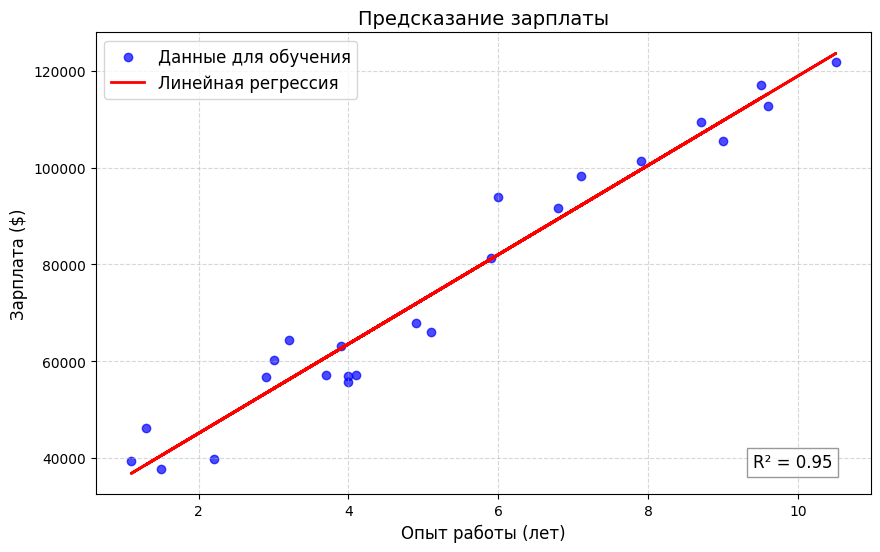

In [80]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Данные для обучения', alpha=0.7)
plt.plot(  # Линия регрессии
    X_train, 
    model.predict(X_train), 
    color='red', 
    linewidth=2,
    label='Линейная регрессия'
)

# Добавляем показатель R² на график
r2_score = model.score(X_test, y_test)
plt.text(0.95, 0.05, f'R² = {r2_score:.2f}', 
         fontsize=12,
         ha='right', va='bottom',
         transform=plt.gca().transAxes,
         bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

plt.title('Предсказание зарплаты', fontsize=14)
plt.xlabel('Опыт работы (лет)', fontsize=12)
plt.ylabel('Зарплата ($)', fontsize=12)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()